In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from sklearn.datasets import make_circles, make_regression

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV  # este es random

In [2]:
training = pd.read_csv('Filtrado.csv')

In [3]:
training.head()

,CPU,RAM (GB),Storage,GPU,Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,11912523.48,59,3,52
1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,7993374.48,57,1,46
2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,5112900.00,68,16,48
3,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,22563005.40,78,28,8
4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,16037611.20,61,16,53


In [5]:
X = training.drop(['Price (Sonic Rings)', 'CPU', 'Storage', 'GPU'], axis=1)
y = training['Price (Sonic Rings)']

Trainorder = pd.concat([X, y], axis=1)

In [18]:
Trainorder.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel,Price (Sonic Rings)
0,8,59,3,52,11912523.48
1,8,57,1,46,7993374.48
2,8,68,16,48,5112900.00
3,16,78,28,8,22563005.40
4,8,61,16,53,16037611.20


In [6]:

# Assuming 'data' is your dataset
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [7]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(781, 4) (196, 4) (781,) (196,)


In [19]:
X_train.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
680,8,70,16,68
740,8,89,4,66
33,16,98,28,55
31,2,19,22,11
730,16,84,4,72


In [42]:
y_test.shape()

TypeError: 'tuple' object is not callable

In [16]:
linear = LinearRegression()

linear.fit(X_train, y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

print (y_test_pred)

[11537909.08468229 10479702.68485923 10534188.34148218  5989655.5205553
  4452801.28740565 24952225.88444554  4660560.14099933  5175296.02222867
  5030894.84211622 11164079.67661886 10046499.14452187  4956966.42909813
 17309266.10299422  3302480.32215701 10314546.99231185 10566259.1086009
  9979750.18923417 18060953.68490185  8463726.31763346 10201895.53431468
 17267729.50209828  8772320.05528301  4482368.05861418 17144034.56133283
  3450380.81524856  7250123.52801759 10524722.50770496 11009352.95285898
  9893563.08358387 10521239.28575517 10201895.53431468  5362573.13530292
  9732484.42990519 10479702.68485923 19965040.20030672  3980172.85399766
 13132928.69933284  9561254.18538707  3695126.48763803 17273712.11392571
 18808612.50102871  3113221.93478016 13182238.57487808  9561254.18538707
  9561254.18538707  2241595.40597235 12147779.93753422  6675109.98981861
  9641213.48332052  8983910.75185599 10479702.68485923  8026369.88931338
 10575724.94237811 11484093.09409228  4650468.3082445

In [14]:
train_score=linear.score(X_train, y_train)
test_score=linear.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)

Train:  0.6651281857582616
Test:  0.5265483434996318


In [15]:
from sklearn.metrics import mean_squared_error

train_sme = mean_squared_error(y_train, y_train_pred)
test_sme = mean_squared_error(y_test, y_test_pred)

print("SME for training set:", train_sme)
print("SME for testing set:", test_sme)

SME for training set: 13592042797171.273
SME for testing set: 17117744777506.572


In [13]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("MAE for training set:", train_mae)
print("MAE for testing set:", test_mae)

MAE for training set: 2725619.6846236293
MAE for testing set: 2996578.6173719666


In [41]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)


y_train_pred = logistic.predict(X_train)
y_test_pred = logistic.predict(X_test)


print("Training set predictions:", y_train_pred)
print("Testing set predictions:", y_test_pred)

ValueError: Unknown label type: 'continuous'

In [22]:
#Let´s try PCA

Trainorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RAM (GB)             977 non-null    int64  
 1   CPULabel             977 non-null    int64  
 2   StorageLabel         977 non-null    int64  
 3   GPULabel             977 non-null    int64  
 4   Price (Sonic Rings)  977 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 38.3 KB


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA


data_n_mano = (Trainorder - Trainorder.mean())/Trainorder.std()

data_n = StandardScaler().fit_transform(Trainorder)

np.sum(data_n_mano - data_n)

RAM (GB)              -2.113587e-14
CPULabel              -2.442491e-15
StorageLabel          -2.142730e-14
GPULabel               2.983724e-16
Price (Sonic Rings)   -1.339207e-15
dtype: float64

In [25]:
data_mm_mano=(Trainorder - np.min(Trainorder))/(np.max(Trainorder) - np.min(Trainorder))

data_mm=MinMaxScaler().fit_transform(Trainorder)

np.sum(data_mm_mano - data_mm)

RAM (GB)              -212.599864
CPULabel              -655.827302
StorageLabel          -404.856882
GPULabel              -490.834174
Price (Sonic Rings)     25.875571
dtype: float64

In [26]:
TrainorderSt = StandardScaler().fit_transform(Trainorder)

In [27]:
pca = PCA()

pca.fit(TrainorderSt)

print(TrainorderSt.shape)

pca.explained_variance_ratio_

(977, 5)


array([0.51865072, 0.21124858, 0.12566584, 0.09871006, 0.04572479])

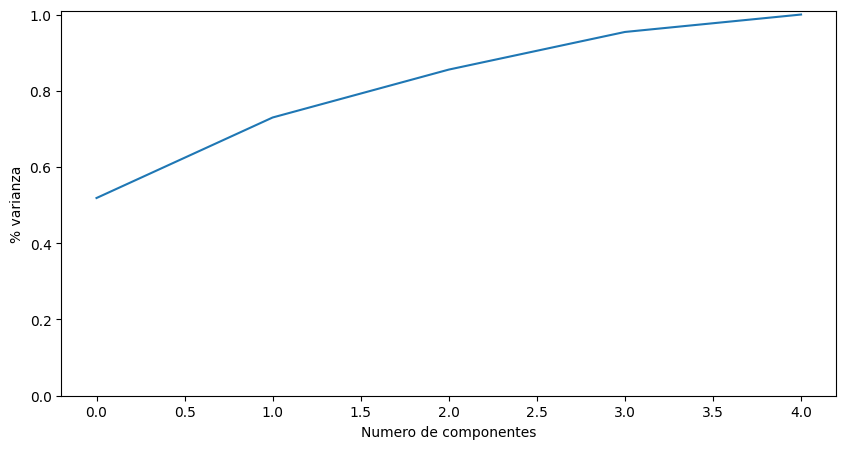

In [28]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [31]:
pca = PCA(n_components=4)

Trainorder_pca=pca.fit_transform(TrainorderSt)


df=pd.DataFrame(Trainorder_pca)

df.head()


,0,1,2,3
0,-0.365685,-1.250986,0.747804,0.715709
1,-0.913870,-1.415763,0.887600,0.583709
2,-0.578597,0.013969,-0.239214,-0.074185
3,1.424705,2.539713,1.960882,-0.674280
4,0.334680,0.225533,0.149588,0.566245


In [32]:
sum(pca.explained_variance_ratio_)

0.9542752109872263

In [33]:
pd.DataFrame(TrainorderSt).head()

,0,1,2,3,4
0,-0.105737,-0.537373,-1.596889,0.111811,0.300407
1,-0.105737,-0.623469,-1.852318,-0.183963,-0.321364
2,-0.105737,-0.149941,0.063400,-0.085372,-0.778350
3,1.495888,0.280539,1.595974,-2.057197,1.990101
4,-0.105737,-0.451277,0.063400,0.161106,0.954851


In [34]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4
0,0.172114,-0.504752,-1.570478,0.137562,-0.020501
1,-0.105360,-0.623425,-1.852282,-0.183928,-0.321799
2,-0.432851,-0.188345,0.032306,-0.115688,-0.400544
3,1.837753,0.320675,1.628470,-2.025513,1.595259
4,0.418743,-0.389701,0.113254,0.209715,0.349094


In [35]:
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import f1_score as f1

In [40]:
# CON PCA

X_norm = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

X_norm = pca.fit_transform(X_norm)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)
f1(y_test, y_pred)

ValueError: Unknown label type: 'continuous'